In [1]:
import os
os.chdir(os.getcwd() + '/../../')

In [2]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from scripts.utils import *

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PendragonS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PendragonS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
comments = pd.read_csv('data/comments/preprocessed_comments.csv', index_col=0)
comments = comments.dropna()
comments.head()

,toxic,comment_text
0,0,explanation why the edits make under my userna...
1,0,d'aww ! he match this background colour i be s...
2,0,"hey man , i be really not try to edit war . it..."
3,0,`` more i can not make any real suggestion on ...
4,0,"you , sir , be my hero . any chance you rememb..."


# 1. TF-IDF

In [4]:
# vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments['comment_text'])
y = comments['toxic']

# train val, test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=0)

In [5]:
# total numbe of features
print(len(vectorizer.get_feature_names()))

179429


## 1.1. Logistic regression

In [6]:
model = LogisticRegression(max_iter=10000, class_weight='balanced', C=6.7341506577508286).fit(X_train, y_train)
probs = model.predict_proba(X_val)

In [7]:
toxic_freq_list = []
thresholds = np.linspace(0.5, 1, 1000)

for t in thresholds:
    preds = np.zeros(len(y_val))
    preds[probs[:, 1] >= t] = 1
    toxic_freq_list.append(preds.sum())

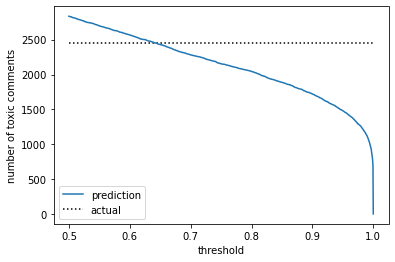

In [8]:
plt.plot(thresholds, toxic_freq_list, label='prediction')
plt.xlabel('threshold')
plt.ylabel('number of toxic comments')
plt.hlines(y_val.sum(), 0.5, 1, color='k', linestyles='dotted', label='actual')
plt.legend(loc='lower left')

In [9]:
index = np.argwhere(np.array(toxic_freq_list) <= y_val.sum().item()).min()
index

290

In [10]:
thresholds[index]

0.6451451451451451

In [11]:
toxic_freq_list[index]

2443.0

In [12]:
preds = np.zeros(len(y_val))
preds[probs[:, 1] >= thresholds[index]] = 1
get_evaluation_df(y_val, preds, 'logistic regression')

,accuracy,precision,recall,f1,roc_auc
logistic regression,0.955742,0.769546,0.768288,0.768916,0.87195


In [13]:
preds = np.zeros(len(y_val))
preds[probs[:, 1] >= 0.5] = 1
get_evaluation_df(y_val, preds, 'logistic regression')

,accuracy,precision,recall,f1,roc_auc
logistic regression,0.9483,0.698765,0.809563,0.750095,0.886285


In [17]:
# maximizing f1-score

thresholds = np.linspace(0.5, 1, 1000)
f1_scores = []
for t in thresholds:
    preds = np.zeros(len(y_val))
    preds[probs[:, 1] >= t] = 1
    f1 = f1_score(y_val, preds)
    f1_scores.append(f1)

In [18]:
# threshold for max f1

index = np.argmax(np.array(f1_scores))
print(f"threshold for max f1-score = {thresholds[index]}")

threshold for max f1-score = 0.6601601601601601


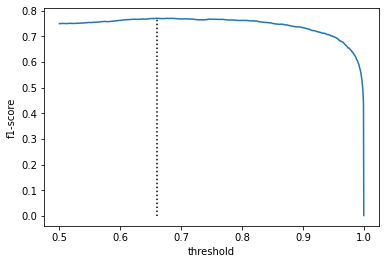

In [21]:
plt.plot(thresholds, f1_scores)
plt.xlabel('threshold')
plt.ylabel('f1-score')
plt.vlines(thresholds[index], 0, max(f1_scores), color='k', linestyles='dotted')

In [16]:
preds = np.zeros(len(y_val))
preds[probs[:, 1] >= thresholds[index]] = 1
get_evaluation_df(y_val, preds, 'logistic regression')

,accuracy,precision,recall,f1,roc_auc
logistic regression,0.956564,0.778982,0.763384,0.771104,0.870213
